In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
BATCH_SIZE = 128
RANDOM_SEED = 42


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 24

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
199/211 [===========================>..] - ETA: 0s - loss: 2.8620 - accuracy: 0.1471
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 1s 2ms/step - loss: 2.8436 - accuracy: 0.1509 - val_loss: 2.3452 - val_accuracy: 0.3541
Epoch 2/1000
206/211 [============================>.] - ETA: 0s - loss: 2.1698 - accuracy: 0.2937
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 2ms/step - loss: 2.1633 - accuracy: 0.2956 - val_loss: 1.5677 - val_accuracy: 0.6811
Epoch 3/1000
171/211 [=======================>......] - ETA: 0s - loss: 1.7547 - accuracy: 0.4037
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 2ms/step - loss: 1.7222 - accuracy: 0.4133 - val_loss: 1.1118 - val_accuracy: 0.8750
Epoch 4/1000
196/211 [==========================>...] - ETA: 0s - loss: 1.4943 - accu

Epoch 28/1000
187/211 [=========================>....] - ETA: 0s - loss: 0.8009 - accuracy: 0.7273
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.8003 - accuracy: 0.7276 - val_loss: 0.2492 - val_accuracy: 0.9796
Epoch 29/1000
185/211 [=========================>....] - ETA: 0s - loss: 0.8138 - accuracy: 0.7182
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 2ms/step - loss: 0.8136 - accuracy: 0.7180 - val_loss: 0.2372 - val_accuracy: 0.9953
Epoch 30/1000
189/211 [=========================>....] - ETA: 0s - loss: 0.7988 - accuracy: 0.7250
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.7969 - accuracy: 0.7252 - val_loss: 0.2312 - val_accuracy: 0.9928
Epoch 31/1000
194/211 [==========================>...] - ETA: 0s - loss: 0.7952

Epoch 55/1000
188/211 [=========================>....] - ETA: 0s - loss: 0.7000 - accuracy: 0.7563
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.7032 - accuracy: 0.7547 - val_loss: 0.1691 - val_accuracy: 0.9837
Epoch 56/1000
194/211 [==========================>...] - ETA: 0s - loss: 0.6944 - accuracy: 0.7624
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.7631 - val_loss: 0.1666 - val_accuracy: 0.9803
Epoch 57/1000
189/211 [=========================>....] - ETA: 0s - loss: 0.6815 - accuracy: 0.7668
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.7665 - val_loss: 0.1606 - val_accuracy: 0.9866
Epoch 58/1000
196/211 [==========================>...] - ETA: 0s - loss: 0.6895

Epoch 82/1000
167/211 [======================>.......] - ETA: 0s - loss: 0.6644 - accuracy: 0.7675
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7703 - val_loss: 0.1506 - val_accuracy: 0.9878
Epoch 83/1000
179/211 [========================>.....] - ETA: 0s - loss: 0.6538 - accuracy: 0.7739
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.7749 - val_loss: 0.1599 - val_accuracy: 0.9826
Epoch 84/1000
191/211 [==========================>...] - ETA: 0s - loss: 0.6500 - accuracy: 0.7780
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.7780 - val_loss: 0.1601 - val_accuracy: 0.9456
Epoch 85/1000
174/211 [=======================>......] - ETA: 0s - loss: 0.6536

Epoch 109/1000
195/211 [==========================>...] - ETA: 0s - loss: 0.6333 - accuracy: 0.7784
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.7791 - val_loss: 0.1480 - val_accuracy: 0.9548
Epoch 110/1000
187/211 [=========================>....] - ETA: 0s - loss: 0.6383 - accuracy: 0.7769
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7775 - val_loss: 0.1455 - val_accuracy: 0.9891
Epoch 111/1000
197/211 [===========================>..] - ETA: 0s - loss: 0.6229 - accuracy: 0.7797
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.7797 - val_loss: 0.1367 - val_accuracy: 0.9809
Epoch 112/1000
195/211 [==========================>...] - ETA: 0s - loss:

211/211 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7833 - val_loss: 0.1464 - val_accuracy: 0.9561
Epoch 136/1000
198/211 [===========================>..] - ETA: 0s - loss: 0.6183 - accuracy: 0.7862
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.7858 - val_loss: 0.1474 - val_accuracy: 0.9860
Epoch 137/1000
178/211 [========================>.....] - ETA: 0s - loss: 0.6200 - accuracy: 0.7850
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6179 - accuracy: 0.7852 - val_loss: 0.1430 - val_accuracy: 0.9536
Epoch 138/1000
196/211 [==========================>...] - ETA: 0s - loss: 0.6011 - accuracy: 0.7885
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
211/211 [==============================] - 0s 1ms/step - loss: 0.6012 - a

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

71/71 [==============================] - 0s 653us/step - loss: 0.1469 - accuracy: 0.9896


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 63ms/step
[1.9645933e-03 3.8665079e-10 1.8406602e-06 6.9876245e-07 2.3567339e-03
 3.6315422e-04 7.2589073e-09 2.4950511e-08 3.1659125e-05 8.9968699e-09
 9.9512237e-01 1.5948520e-18 2.3767397e-14 6.2248686e-09 3.9339684e-06
 1.9006091e-08 6.5213362e-26 2.9918551e-06 0.0000000e+00 4.5662364e-22
 2.2844410e-11 7.3779653e-15 9.7651915e-05 5.4399647e-05]
10


# Confusion matrix

282/282 [==============================] - 0s 528us/step


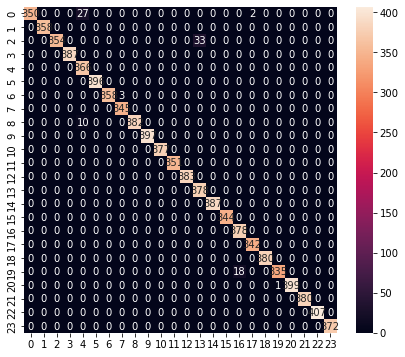

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       379
           1       1.00      1.00      1.00       358
           2       1.00      0.91      0.96       387
           3       1.00      1.00      1.00       387
           4       0.91      1.00      0.95       366
           5       1.00      1.00      1.00       396
           6       1.00      0.99      1.00       361
           7       0.99      1.00      1.00       345
           8       1.00      0.97      0.99       392
           9       1.00      1.00      1.00       397
          10       1.00      1.00      1.00       377
          11       1.00      1.00      1.00       351
          12       1.00      1.00      1.00       383
          13       0.92      1.00      0.96       378
          14       1.00      1.00      1.00       387
          15       1.00      1.00      1.00       344
          16       0.95      1.00      0.98       378
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mfaja\AppData\Local\Temp\tmp5u1zatfu\assets


7424

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 997 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9645924e-03 3.8664930e-10 1.8406531e-06 6.9876182e-07 2.3567351e-03
 3.6315373e-04 7.2588939e-09 2.4950509e-08 3.1659030e-05 8.9968175e-09
 9.9512237e-01 1.5948520e-18 2.3767441e-14 6.2248207e-09 3.9339566e-06
 1.9006091e-08 6.5213110e-26 2.9918492e-06 0.0000000e+00 4.5662536e-22
 2.2844410e-11 7.3779653e-15 9.7651624e-05 5.4399694e-05]
10
